# Introducción

Como Data Analyst, el trabajo consiste en examinar enormes cantidades de información para crear, desarrollar y ejecutar estrategias para el desarrollo empresarial y la gestión estratégica. Además, el Data Analyst traduce estos análisis en información valiosa para la compañía y sus estrategias de crecimiento y resolución de problemas. Utilizando herramientas y técnicas estadísticas para identificar patrones y tendencias entre los datos para la toma de decisiones.

El proyecto consiste en analizar un estudio de mercado y demostrar que tiene esa capacidad de continuar con el éxito, aún así los camareros robots desaparezcan y así atraer a los inversionistas. Esto implica diferentes etapas, como analizar la información general procedente de fuentes abiertas sobre restaurantes en "LOS ANGELES", procesar los datos, realizar una presentación con todo los resultados obtenidos y redactar conclusiones generales.

# Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import plotly.express as px
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from scipy import stats as st
from scipy.stats import ttest_ind

# Paso 1. Descripción de los datos

In [2]:
# Carga de archivo de datos en el DataFrames
df_rest = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
#Imprime la información general/resumida sobre el DataFrame rest_data_us
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
#Imprime una muestra de los datos para rest_data_us
df_rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
#Imprime la descripción general/resumen estadístico sobre el DataFrame rest_data_us
df_rest.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [6]:
# Revisar si hay rest_data_us duplicados
print(df_rest.duplicated().sum()) 

0


In [7]:
#Se verifican los valores ausentes en la columna chain
ausentes = df_rest['chain'].isnull()
df_rest[ausentes]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [8]:
#Se elimina los valores de la columna chain
df_rest = df_rest.dropna()

In [9]:
#Se verifican nuevamente los valores ausentes en la columna chain
ausentes = df_rest['chain'].isnull()
df_rest[ausentes]

,id,object_name,address,chain,object_type,number


Para el análisis y desarrollo de este proyecto se importo un dataset, los datos se encuentran en orden, no se encontraron valores duplicados, durante el hallazgo se econtraron 3 valores ausentes en la columna 'chain', se eliminaron y se lidiará con este pequeño detalle en el próximo paso.

# Paso 2. Análisis de datos

•	Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [10]:
#Se calculan el total de segmentos por los distintos tipos de establecimientos
total_segments = df_rest['number'].sum()
total_segments

421652

In [11]:
#Se muestran unicamente los datos que contiene object_type
df_rest.object_type.sort_values().unique()

array(['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant'],
      dtype=object)

In [12]:
#Se calcula el subtotal de segmentos por cada tipo de establecimiento
bakery = (df_rest[df_rest['object_type'] == 'Bakery']['number'].sum()) / total_segments
bar = (df_rest[df_rest['object_type'] == 'Bar']['number'].sum()) / total_segments
cafe = (df_rest[df_rest['object_type'] == 'Cafe']['number'].sum()) / total_segments
fast_food = (df_rest[df_rest['object_type'] == 'Fast Food']['number'].sum()) / total_segments
pizza = (df_rest[df_rest['object_type'] == 'Pizza']['number'].sum()) / total_segments
restaurant = (df_rest[df_rest['object_type'] == 'Restaurant']['number'].sum()) / total_segments

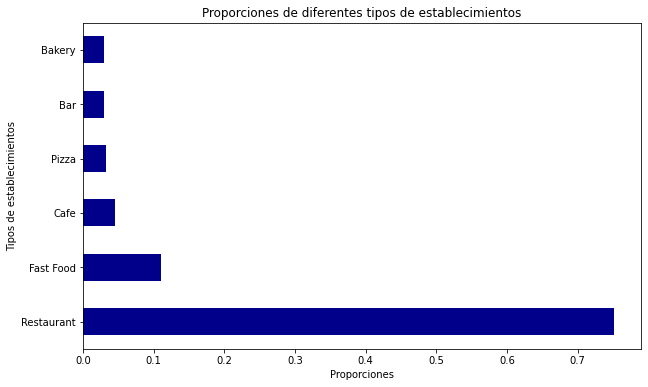

In [13]:
keys = ['Restaurant', 'Fast Food', 'Bar', 'Cafe', 'Pizza', 'Bakery']
vals = [restaurant, fast_food, bar, cafe, pizza, bakery]

plt.figure(figsize=(10,6))

df_rest['object_type'].value_counts(normalize=True).plot(kind='barh', color= 'darkblue')
plt.title('Proporciones de diferentes tipos de establecimientos')
plt.xlabel('Proporciones')
plt.ylabel('Tipos de establecimientos')
plt.show()

Según se logra visualizar en la gráfica, la proporción de numeros de asientos de un restaurante es mayor que a los otros tipos de establecimientos.

•	Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.


In [14]:
#Se muestran unicamente los datos que contiene chain
df_rest.chain.sort_values().unique()

array([False, True], dtype=object)

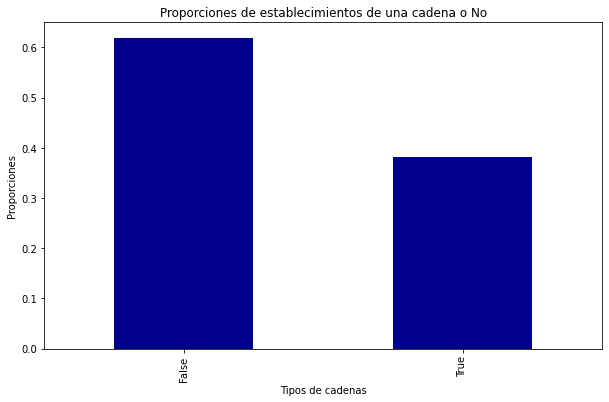

In [15]:
#Se calcula el subtotal de segmentos por cada tipo de establecimiento que pertenece a una cadena
false = (df_rest[df_rest['chain'] == False]['number'].sum()) / total_segments
true = (df_rest[df_rest['chain'] == True]['number'].sum()) / total_segments
keys = ['False', 'True']
vals = [false, true]

plt.figure(figsize=(10,6))

df_rest['chain'].value_counts(normalize=True).plot(kind='bar', color= 'darkblue')
plt.title('Proporciones de establecimientos de una cadena o No')
plt.xlabel('Tipos de cadenas')
plt.ylabel('Proporciones')
plt.show()

Con base a los datos analizados, se puede estimar que los establecimientos que no pertenecen a una cadena poseen el mayor número de asientos que los establecimientos que sí son una cadena.

•	¿Qué tipo de establecimiento es habitualmente una cadena?

In [16]:
(df_rest
     .assign(chain_num= df_rest['chain'].astype(int))
     .pivot_table(index='object_type', 
                  values='chain_num', 
                  aggfunc=['sum', 'count', 'mean']))

,sum,count,mean
,chain_num,chain_num,chain_num
object_type,,,
Bakery,283,283,1.000000
Bar,77,292,0.263699
Cafe,266,435,0.611494
Fast Food,605,1066,0.567542
Pizza,153,319,0.479624
Restaurant,2292,7253,0.316007


Al momento de obtener los datos a través de la talba dinamica, se puede apreciar que el tipo de establecimiento que habitualmente es una cadena, es Bakery, debido que no tiene ningún establecimiento que no sea una cadena.

•	¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

<AxesSubplot:xlabel='number', ylabel='Count'>

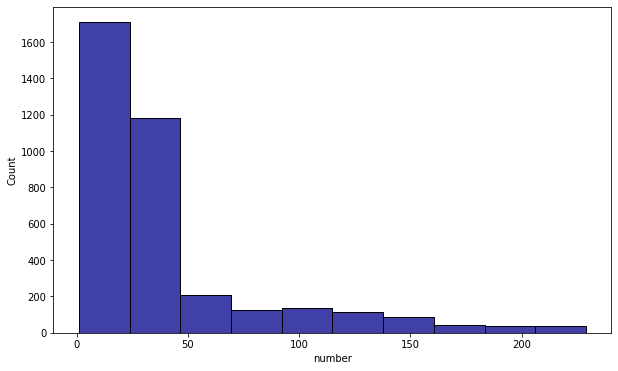

In [17]:
chains = df_rest.query('chain == True')
plt.figure(figsize=(10,6))
sns.histplot(chains['number'], bins=10, color= 'darkblue')

In [18]:
chains['object_name'].count()

3676

In [19]:
chains['number'].sum()

145916

In [20]:
no_chains = df_rest.query('chain == False')
no_chains['object_name'].count()

5972

<AxesSubplot:xlabel='number', ylabel='Count'>

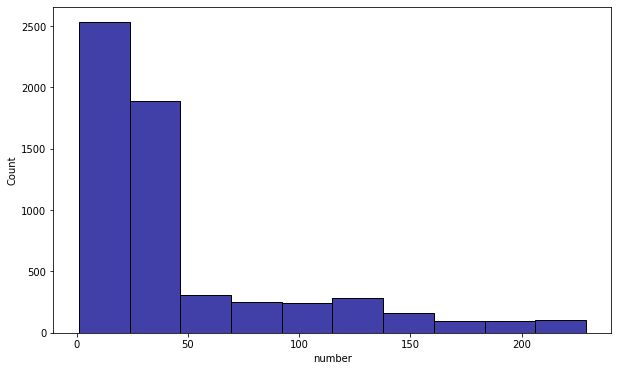

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(no_chains['number'], bins=10, color= 'darkblue')

•	Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿Qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [22]:
df_rest.groupby('object_type')['number'].mean().sort_values(ascending=False)

object_type
Restaurant    48.048807
Bar           44.767123
Fast Food     31.837711
Pizza         28.545455
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

<AxesSubplot:xlabel='object_type', ylabel='number'>

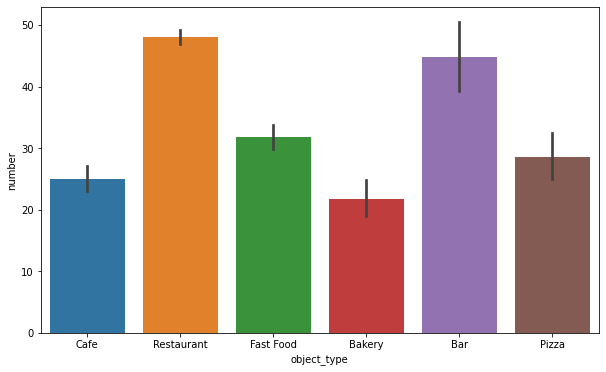

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='object_type', y='number', data= df_rest, estimator= np.mean)

Al momento de observar los gráficos estadísticos, se puede apreciar que restaurante es la que lidera con una mayor cantidad de asientos para cada tipo de establecimiento.


•	Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [24]:
df_rest['street_name'] = df_rest['address'].str.split().str[1:4].str.join(' ')
df_rest['street_name'] = df_rest['street_name'].str.replace(r'^(?:[W|N|S|E] )|(?:\s[#|W|N|S|E])$', '', regex=True) 
df_rest.head(10)

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100,WORLD WAY 126
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,6TH ST
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,SAN FERNANDO
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,CAHUENGA BLVD


•	Traza un gráfico de las diez mejores calles por número de restaurantes.

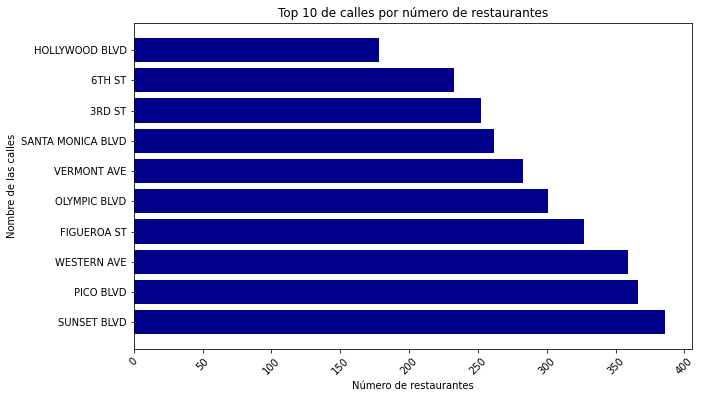

In [25]:
top_streets = df_rest.groupby('street_name')['object_type'].count().sort_values(ascending=False).head(10).reset_index()
top_streets.columns = ['street_name', 'restaurants']
plt.figure(figsize=(10, 6))
plt.barh(top_streets['street_name'], top_streets['restaurants'], color= 'darkblue')
plt.xlabel('Número de restaurantes')
plt.ylabel('Nombre de las calles')
plt.title('Top 10 de calles por número de restaurantes')
plt.xticks(rotation=45)
plt.show()

Con base los datos que se arrojan en la gráfica, se puede concluir que la calle 'SUNSET BLVD' es la que lidera el top 10 de mejores calles por número de restaurantes.

•	Encuentra el número de calles que solo tienen un restaurante.

In [26]:
few_rests = df_rest.groupby('street_name')['object_type'].count().reset_index()
few_rests.columns = ['street_name', 'restaurants']
only_one = few_rests.query('restaurants == 1')
only_one.groupby('street_name').count()

,restaurants
street_name,
1/2 3RD ST,1
1/2 7TH ST,1
1/2 CITY TERRACE,1
1/2 COLORADO BLVD,1
1/2 E 2ND,1
...,...
ZOO DR,1
hollywood BLVD,1
pico BLVD,1


Según la información que se visualiza en la tabla dinámica, se aprecia que alrededor de 630 calles tienen únicamente un restaurante.

•	Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?



In [27]:
seats = df_rest.groupby('street_name')['number'].sum().reset_index()
distr = top_streets.merge(seats, on='street_name', how='left')
distr

,street_name,restaurants,number
0,SUNSET BLVD,386,18680
1,PICO BLVD,366,14920
2,WESTERN AVE,359,15007
3,FIGUEROA ST,327,14756
4,OLYMPIC BLVD,301,14916
5,VERMONT AVE,283,12919
6,SANTA MONICA BLVD,262,9164
7,3RD ST,252,10351
8,6TH ST,233,9442
9,HOLLYWOOD BLVD,178,9679


<AxesSubplot:xlabel='restaurants', ylabel='number'>

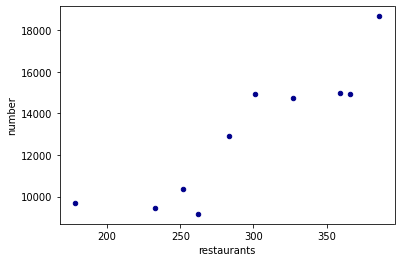

In [28]:
distr.plot(x='restaurants', y='number', kind='scatter', color='darkblue')


Según la información que se muestra, es que las calles con muchos restaurantes, su número de asientos se distribuye más entre  10000 a 15000 asientos, entre 250 a 350 restaurantes.

Llega a una conclusión y aporta recomendaciones sobre el tipo de restaurante y el número de asientos. Comenta la posibilidad de desarrollar una cadena.

Después de analizar el dataframe se puede concluir, que el tipo de establecimiento que necesita mas enfoque, es el de tipo restaurante, asimismo, se aprecia que la calle de "LOS ANGELES" el que posee mayor potencial para desarrollar este proyecto, es la calle SUNSET BLVD; debido a las proporciones que tiene en el número de sillas, y por la cantidad de establecimientos que posee, esto demuestra que la inversión sea rentable.

# Paso 3. Preparar una presentación


Presentación: <https://drive.google.com/file/d/1AQVI7GP_GAvc1yFUTMb3NpUyHFo5g7jl/view?usp=sharing>